Data loaded successfully!
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065           

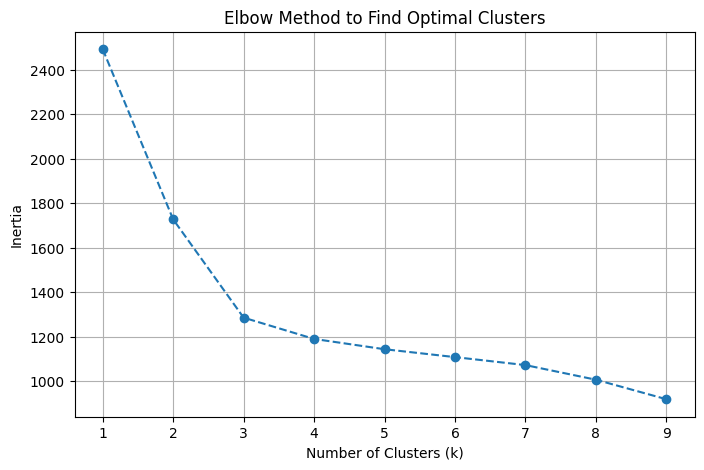


Cluster Centers (normalized):
[[-9.09328403e-01 -3.80707476e-01 -5.19747426e-01  1.37767008e-01
  -4.97451451e-01 -9.62003532e-02 -7.65223671e-04 -4.11471063e-03
   1.12388425e-02 -8.81229129e-01  4.32636626e-01  2.30777949e-01
  -7.63273163e-01  7.99603601e-02]
 [ 8.35232085e-01 -3.03809683e-01  3.64706042e-01 -6.10191294e-01
   5.77586799e-01  8.85237363e-01  9.77819557e-01 -5.62089654e-01
   5.80286581e-01  1.71063479e-01  4.73983650e-01  7.79247107e-01
   1.12518529e+00 -1.15133539e+00]
 [ 1.86543138e-01  9.04971453e-01  2.49210264e-01  5.83703484e-01
  -5.06353947e-02 -9.88556997e-01 -1.23619475e+00  7.16841717e-01
  -7.49607560e-01  9.88498285e-01 -1.19129878e+00 -1.30153966e+00
  -3.80044610e-01  1.34745816e+00]]


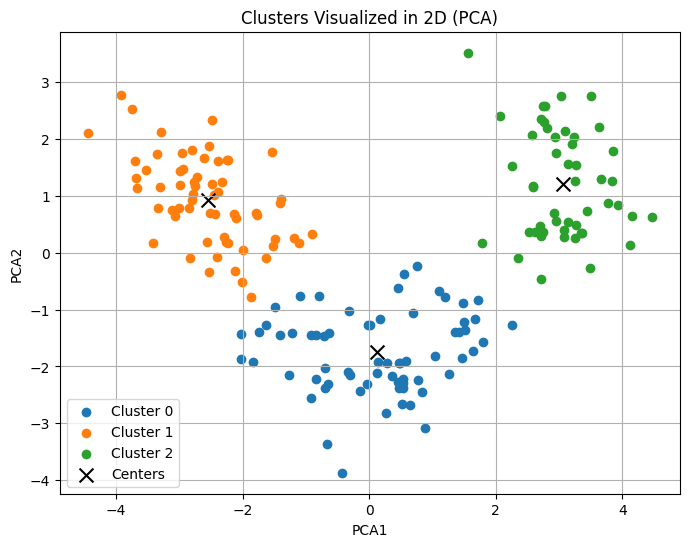


Explanation of Results:
1. The optimal number of clusters was chosen using the Elbow Method.
2. Each cluster represents a group of data points with similar patterns.
3. PCA reduces high-dimensional data to 2D for visualization.
4. The cluster centers show the average characteristics of each cluster in normalized space.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Data
data_url = "https://drive.google.com/uc?export=download&id=1lwmokQo-3nw9SyrwxeljcAQlWvnEQ4OT"
df = pd.read_csv(data_url)

print("Data loaded successfully!")
print(df.head())

# Step 2: Preprocess the Data
# Drop non-numerical columns (if any) and handle missing values
df_cleaned = df.select_dtypes(include=[np.number]).dropna()

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_cleaned)

# Step 3: Implement K-Means Clustering from Scratch
class KMeansScratch:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            # Step 1: Assign points to the nearest centroid
            distances = np.linalg.norm(X[:, None] - self.centroids, axis=2)
            cluster_labels = np.argmin(distances, axis=1)

            # Step 2: Calculate new centroids
            new_centroids = np.array([X[cluster_labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Step 3: Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids

        self.cluster_labels = cluster_labels

    def predict(self, X):
        distances = np.linalg.norm(X[:, None] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Step 4: Determine the Optimal Number of Clusters (Elbow Method)
inertia = []
range_clusters = range(1, 10)

for k in range_clusters:
    kmeans = KMeansScratch(n_clusters=k)
    kmeans.fit(data_normalized)
    # Compute inertia (sum of squared distances to closest centroid)
    distances = np.linalg.norm(data_normalized - kmeans.centroids[kmeans.cluster_labels], axis=1)
    inertia.append(np.sum(distances**2))

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title("Elbow Method to Find Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 5: Fit the K-Means Model with the Optimal Clusters
optimal_clusters = 3  # Choose based on the elbow plot
kmeans = KMeansScratch(n_clusters=optimal_clusters)
kmeans.fit(data_normalized)

# Print Cluster Centers
print("\nCluster Centers (normalized):")
print(kmeans.centroids)

# Step 6: Visualize Clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Add cluster labels to the PCA data for visualization
df_pca = pd.DataFrame(data_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = kmeans.cluster_labels

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    cluster_points = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(cluster_points["PCA1"], cluster_points["PCA2"], label=f"Cluster {cluster}")

# Plot cluster centers
centroids_pca = pca.transform(kmeans.centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color="black", marker="x", s=100, label="Centers")

plt.title("Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Explain Results
print("\nExplanation of Results:")
print("1. The optimal number of clusters was chosen using the Elbow Method.")
print("2. Each cluster represents a group of data points with similar patterns.")
print("3. PCA reduces high-dimensional data to 2D for visualization.")
print("4. The cluster centers show the average characteristics of each cluster in normalized space.")

